<a href="https://colab.research.google.com/github/JARACH-209/AI-ML_Lab/blob/master/ML_Lab_Endsem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Achal Dixit
##1801007

###Question 5

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
%matplotlib inline

X,Y = load_iris(return_X_y = True)

In [ ]:
#Train size = 80%
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size = 0.8)

##Q5 Part a)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Implementing GridSearchCV to find optimal K in KNN
# Also performs 5-fold CV   
neighbors = {'n_neighbors': np.arange(1,25)}
clf = GridSearchCV(KNeighborsClassifier(), neighbors, cv=5)clf.
clf.fit(x_train,y_train)

In [ ]:
clf.best_params_

{'n_neighbors': 3}

Best K = 3

In [ ]:
# Training KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [ ]:
print("Test Accuracy of KNN %.2f"%((accuracy_score(y_test,knn.predict(x_test)))*100),"%")

Test Accuracy of KNN 93.33 %


###Q5 Part b)

In [ ]:
# Training KMeans 

kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train)
y_pred = kmeans.predict(x_test)
y_pred_train = kmeans.predict(x_train)

In [ ]:
dbscan = DBSCAN(eps=0.5,min_samples = 3)
dbscan.fit(x_train)
y_pred_db = dbscan.labels_

# Best Param for DBSCAN is Eps = 0.8-0.9. Observed Visually.
# There are only two density based clusters
# Making eps very small results in multiple clusters

# For, Eps = 0.5 we see clustering close to actual plot but more than
# 3 classes
dbscan_ = DBSCAN(eps=0.8,min_samples = 3)
dbscan_.fit(x_train)
y_pred_db_ep = dbscan_.labels_

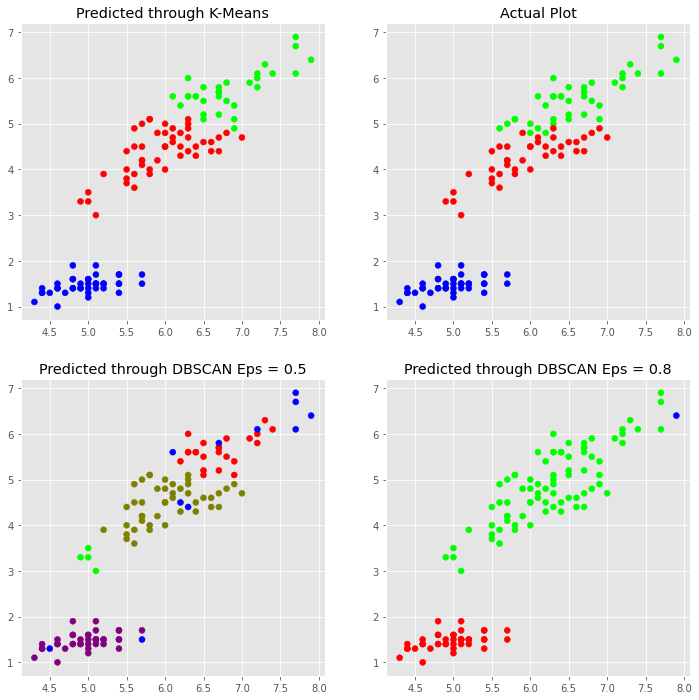

In [ ]:
xdf = pd.DataFrame(x_train)
plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axes[0][0].scatter(xdf[0],xdf[2],c=y_pred_train,cmap='brg')
axes[0][1].scatter(xdf[0],xdf[2],c=y_train,cmap='brg')
axes[1][1].scatter(xdf[0],xdf[2],c=y_pred_db_ep,cmap='brg')
axes[1][0].scatter(xdf[0],xdf[2],c=y_pred_db,cmap='brg')
axes[0][0].title.set_text("Predicted through K-Means")
axes[0][1].title.set_text("Actual Plot")
axes[1][1].title.set_text("Predicted through DBSCAN Eps = 0.8")
axes[1][0].title.set_text("Predicted through DBSCAN Eps = 0.5")

# Coloring DOES NOT matter 

###Q5 Part c)

In [ ]:
y_pred_train

array([0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2,
       1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 1, 1,
       1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 2,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2,
       0, 1, 2, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 2, 0, 0, 0, 2, 2, 0], dtype=int32)

In [ ]:
y_train

array([0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2,
       1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 2, 0, 0, 0, 2, 2, 0])

We can observe that labelling for clusters is (y_true : y_pred):
* class 1 as class 1
* class 2 as class 2
* class 0 as class 0

NOTE : Labelling in clustering doesn't mean anythig but we need to know the labels in order to check the accuracy for this assignment. In clustering, clusters may get assigned to any label which may or may not be same as our actual dataset.
In actual cases we will not have Test set because it is unsupervised learning technique.

In [ ]:
misclassified = 0
for y1,y2 in zip(y_pred_train,y_train):
    if y1 != 0 and y2 == 0:
        misclassified +=1
    if y1 != 1 and y2 == 1:
        misclassified +=1
    if y1 != 2 and y2 == 2:
        misclassified +=1

In [ ]:
print("Accuracy of Kmeans through misclassifications : %0.2f"%((len(y_test)-misclassified)/len(y_test)*100))

Accuracy of Kmeans through misclassifications : 63.33


Comparision of Clustering through Kmeans and DBSCAN

In [ ]:
print("Silouhette Coefficient of DBSCAN \t\t%0.2f"%(silhouette_score(x_train,dbscan.labels_)*100))
print("Silouhette Coefficient of K-Means \t\t%0.2f"%(silhouette_score(x_train,y_pred_train)*100))
print("Silouhette Coefficient of Actual Dataset \t%0.2f"%(silhouette_score(x_train,y_train)*100))

Silouhette Coefficient of DBSCAN 		39.68
Silouhette Coefficient of K-Means 		55.10
Silouhette Coefficient of Actual Dataset 	51.26
